# Customer Propensity Modelling

In [1]:
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Extraction

In [2]:
path_to_zip_file = './Data/archive.zip'

In [3]:
def file_extraction(path_to_zip_file):
    with zipfile.ZipFile(path_to_zip_file, mode="r") as archive:
        for filename in archive.namelist():
            if filename[filename.index('.')+1:] == 'csv':
                df = pd.read_csv(archive.open(filename)) 
    return df

In [4]:
marketing_df = file_extraction(path_to_zip_file)

## Data Cleaning

### Columns Extraction

In [5]:
columns_list = marketing_df.columns.tolist()
marketing_df_column_names = columns_list[0].split(";")

In [6]:
len(marketing_df_column_names) #Verified that they are 29 columns present in the dataset

29

### Rows Extraction

In [7]:
row_list = []
for i in range(len(marketing_df)):
    row = marketing_df.iloc[i].tolist()[0].split(";")
    row_list.append(row)

In [8]:
cleaned_marketing_df = pd.DataFrame(row_list, columns = marketing_df_column_names)

In [9]:
cleaned_marketing_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


### NULL Value Analysis

In [10]:
cleaned_marketing_df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

### Empty String Analysis

In [11]:
def empty_strings_in_columns(df):
    null_count_dictionary = {}
    null_count_column_names = []
    for j in df.columns.tolist():
        count = 0
        for i in df[j]:
            if i == '':
                count = count + 1
        null_count_dictionary[j] = count
    for key, value in null_count_dictionary.items():
        if value > 0:
            null_count_column_names.append(key)
    return null_count_column_names, null_count_dictionary

In [12]:
columns_containing_empty_string, null_count_dictionary = empty_strings_in_columns(cleaned_marketing_df)

In [13]:
null_count_dictionary

{'ID': 0,
 'Year_Birth': 0,
 'Education': 0,
 'Marital_Status': 0,
 'Income': 24,
 'Kidhome': 0,
 'Teenhome': 0,
 'Dt_Customer': 0,
 'Recency': 0,
 'MntWines': 0,
 'MntFruits': 0,
 'MntMeatProducts': 0,
 'MntFishProducts': 0,
 'MntSweetProducts': 0,
 'MntGoldProds': 0,
 'NumDealsPurchases': 0,
 'NumWebPurchases': 0,
 'NumCatalogPurchases': 0,
 'NumStorePurchases': 0,
 'NumWebVisitsMonth': 0,
 'AcceptedCmp3': 0,
 'AcceptedCmp4': 0,
 'AcceptedCmp5': 0,
 'AcceptedCmp1': 0,
 'AcceptedCmp2': 0,
 'Complain': 0,
 'Z_CostContact': 0,
 'Z_Revenue': 0,
 'Response': 0}

In [14]:
columns_containing_empty_string

['Income']

### Data Type Verification

In [15]:
cleaned_marketing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   object
 1   Year_Birth           2240 non-null   object
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4   Income               2240 non-null   object
 5   Kidhome              2240 non-null   object
 6   Teenhome             2240 non-null   object
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   object
 9   MntWines             2240 non-null   object
 10  MntFruits            2240 non-null   object
 11  MntMeatProducts      2240 non-null   object
 12  MntFishProducts      2240 non-null   object
 13  MntSweetProducts     2240 non-null   object
 14  MntGoldProds         2240 non-null   object
 15  NumDealsPurchases    2240 non-null   object
 16  NumWeb

In [16]:
def integer_float_bool_indentifier(empty_string_columns, df):
    """
    
    To find the integer/float/boolean valued columns out of a list of columns
    
    """
    integer_float_valued_columns = []
    boolean_valued_columns = []
    for i in empty_string_columns:
        if df[i].nunique() >=3:
            integer_float_valued_columns.append(i)
        else:
             boolean_valued_columns.append(i)
    return integer_float_valued_columns, boolean_valued_columns

In [17]:
integer_float_valued_marketing_df_columns, boolean_valued_marketing_df_columns = integer_float_bool_indentifier(columns_containing_empty_string, cleaned_marketing_df)

In [18]:
integer_float_valued_marketing_df_columns

['Income']

In [19]:
boolean_valued_marketing_df_columns

[]

In [20]:
cleaned_marketing_df.Z_CostContact.value_counts() #Will be treated as Integer

3    2240
Name: Z_CostContact, dtype: int64

In [21]:
cleaned_marketing_df.Z_Revenue.value_counts() #Will be treated as Integer

11    2240
Name: Z_Revenue, dtype: int64

- After checking the documentation of the dataset, the following columns are taken as integer, float, date, boolean, type
    - Float - 'Income',  'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'
    - Integer - 'Kidhome', 'Teenhome', 'Recency', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',  'NumStorePurchases', 'NumWebVisitsMonth', 'Z_CostContact', 'Z_Revenue', 'Year_Birth'
    - Date - 'Dt_Customer'
    - Boolean - 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response'
    - String/Object - 'ID', 'Education', 'Marital_Status'  

### Changing Data Types and Data Imputation

> Date Type Columns

In [22]:
cleaned_marketing_df['Dt_Customer'] = cleaned_marketing_df['Dt_Customer'].astype('datetime64[ns]')

> Integer Columns | Booleans in this case will also be treated as integer for better analysis

In [23]:
for i in ['Kidhome', 'Teenhome', 'Recency', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Z_CostContact', 'Z_Revenue', 'Year_Birth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response']:
    cleaned_marketing_df[i] = cleaned_marketing_df[i].astype('str').astype('int')

> Float Columns

In [24]:
## For Income Column as it contains empty strings
cleaned_marketing_df['Income'] = cleaned_marketing_df['Income'].replace('', '0')
cleaned_marketing_df['Income'] = cleaned_marketing_df['Income'].astype('str').astype('float')
cleaned_marketing_df['Income'] = cleaned_marketing_df['Income'].replace(0, np.mean(cleaned_marketing_df['Income']))

In [25]:
for i in  ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']:
    cleaned_marketing_df[i] = cleaned_marketing_df[i].astype('str').astype('float')

In [26]:
cleaned_marketing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   object        
 1   Year_Birth           2240 non-null   int32         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int32         
 6   Teenhome             2240 non-null   int32         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int32         
 9   MntWines             2240 non-null   float64       
 10  MntFruits            2240 non-null   float64       
 11  MntMeatProducts      2240 non-null   float64       
 12  MntFishProducts      2240 non-null   float64       
 13  MntSweetProducts     2240 non-nul

## Data Transformation | Feature Engineering

In [27]:
cleaned_marketing_df_engineered = cleaned_marketing_df.copy()

### ID Column

In [28]:
cleaned_marketing_df_engineered.drop(columns = ['ID'], inplace=True)

### Education Column

In [29]:
cleaned_marketing_df_engineered.Education.value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

- After doing a research on different education levels
    - 2n Cycle is a seperate multi-disciplinary program and hence should not be merged with Graduation or Master
    - Basic is going to assumed as customers who have done education till their high school. Hence, Basic will be renamed as High-School

In [30]:
cleaned_marketing_df_engineered.Education = cleaned_marketing_df_engineered.Education.replace('Basic', 'High School')

In [31]:
cleaned_marketing_df_engineered.Education.value_counts()

Graduation     1127
PhD             486
Master          370
2n Cycle        203
High School      54
Name: Education, dtype: int64

### Marital Status Column

In [32]:
cleaned_marketing_df_engineered.Marital_Status.value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

- Combining different levels in order to have two categories - Single and Married

In [33]:
cleaned_marketing_df_engineered.Marital_Status = cleaned_marketing_df_engineered.Marital_Status.replace(['Divorced', 'Widow', 'Alone', 'Absurd', 'YOLO'], 'Single')
cleaned_marketing_df_engineered.Marital_Status = cleaned_marketing_df_engineered.Marital_Status.replace('Together', 'Married')

In [34]:
cleaned_marketing_df_engineered.Marital_Status.value_counts()

Married    1444
Single      796
Name: Marital_Status, dtype: int64

### Kidhome and Teenhome Column

In [35]:
cleaned_marketing_df_engineered['Minorshome'] = 0

In [36]:
cleaned_marketing_df_engineered['Minorshome'] = cleaned_marketing_df_engineered.loc[:, ['Kidhome', 'Teenhome']].sum(axis=1) #Sum of Teens and Kids

In [37]:
cleaned_marketing_df_engineered.drop(columns = ['Kidhome', 'Teenhome'], inplace=True)

### Total Amount Spent

In [38]:
cleaned_marketing_df_engineered['TotalMnt'] = 0
cleaned_marketing_df_engineered['TotalMnt'] = cleaned_marketing_df_engineered.loc[:, ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

### Total Amount of Purchases

In [39]:
cleaned_marketing_df_engineered['TotalPurchases'] = 0
cleaned_marketing_df_engineered['TotalPurchases'] = cleaned_marketing_df_engineered.loc[:, ['NumCatalogPurchases', 'NumStorePurchases', 'NumWebPurchases']].sum(axis=1)

### Number of Times participated in the Campaign

In [40]:
cleaned_marketing_df_engineered['TotalCampPar'] = 0
cleaned_marketing_df_engineered['TotalCampPar'] = cleaned_marketing_df_engineered.loc[:, ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)

### Age | The Age at which the customer enrolled themself in the company

In [41]:
cleaned_marketing_df_engineered['Age'] = 0
cleaned_marketing_df_engineered['Age'] = cleaned_marketing_df_engineered.Dt_Customer.dt.year - cleaned_marketing_df_engineered.Year_Birth

In [42]:
cleaned_marketing_df_engineered.drop(columns = ['Year_Birth'], inplace=True)

### Z_CostContact and Z_Revenue Column

In [43]:
cleaned_marketing_df_engineered.drop(columns = ['Z_CostContact', 'Z_Revenue'], inplace = True) # 0 Variability

In [44]:
cleaned_marketing_df_engineered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Education            2240 non-null   object        
 1   Marital_Status       2240 non-null   object        
 2   Income               2240 non-null   float64       
 3   Dt_Customer          2240 non-null   datetime64[ns]
 4   Recency              2240 non-null   int32         
 5   MntWines             2240 non-null   float64       
 6   MntFruits            2240 non-null   float64       
 7   MntMeatProducts      2240 non-null   float64       
 8   MntFishProducts      2240 non-null   float64       
 9   MntSweetProducts     2240 non-null   float64       
 10  MntGoldProds         2240 non-null   float64       
 11  NumDealsPurchases    2240 non-null   int32         
 12  NumWebPurchases      2240 non-null   int32         
 13  NumCatalogPurchases  2240 non-nul

## Outlier Detection

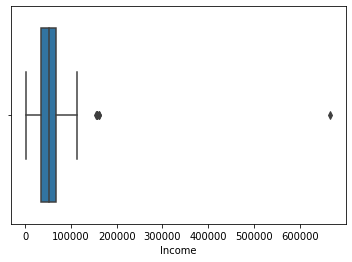

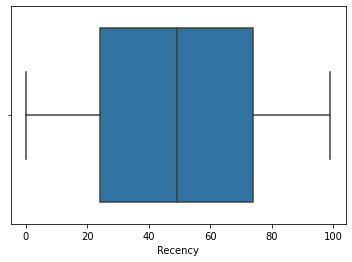

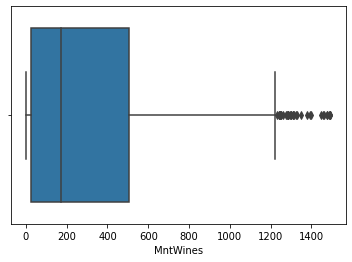

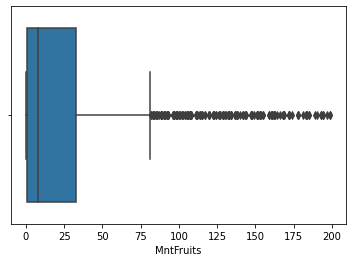

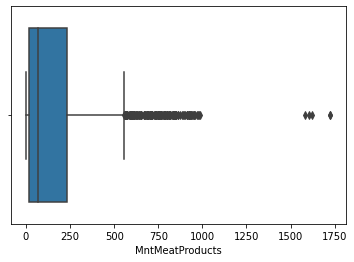

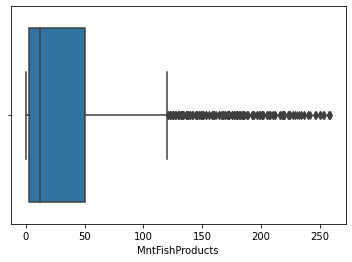

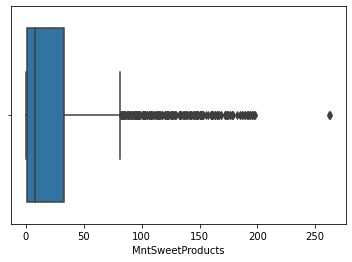

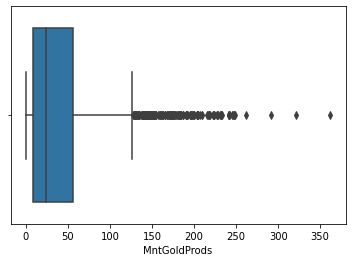

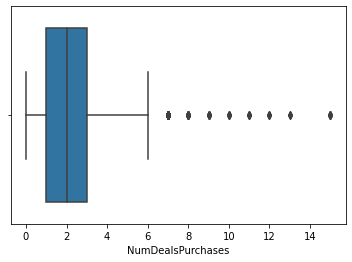

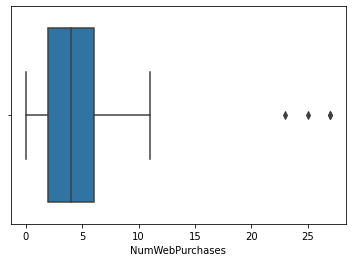

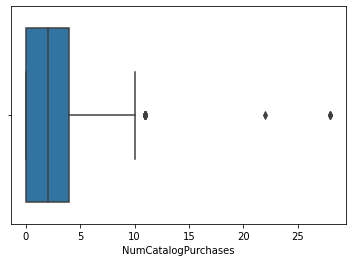

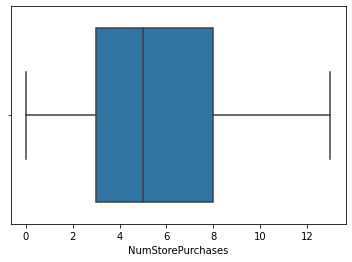

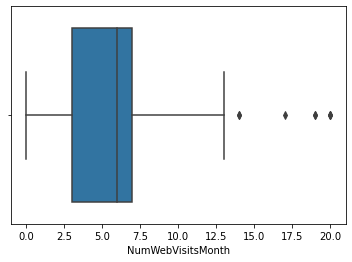

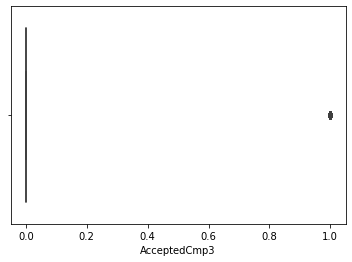

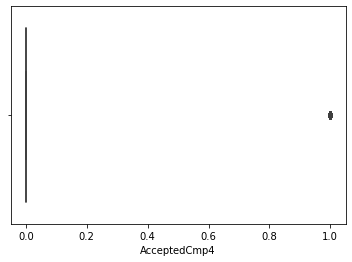

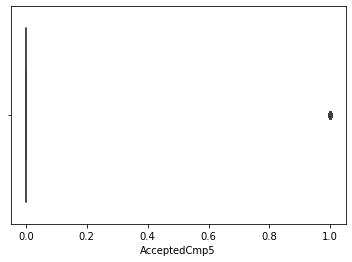

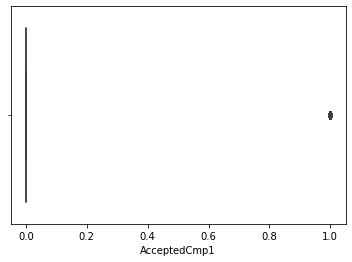

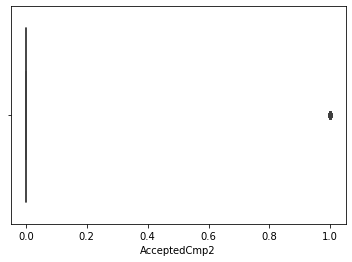

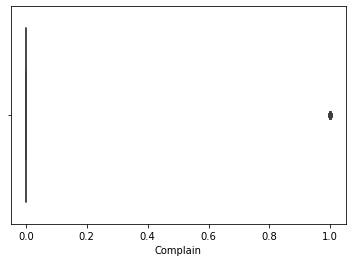

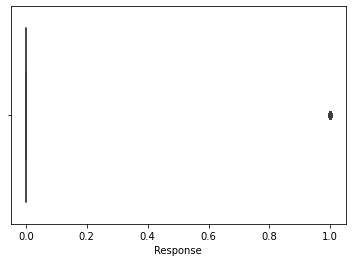

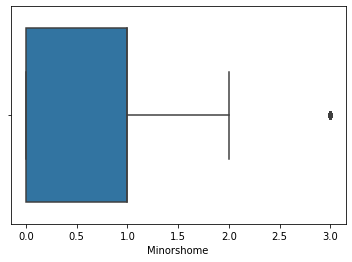

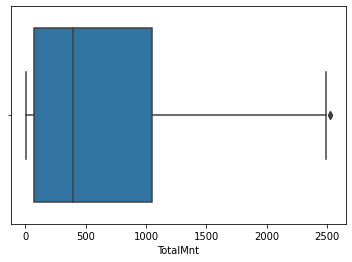

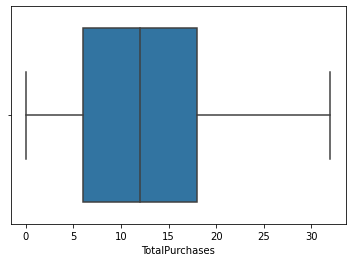

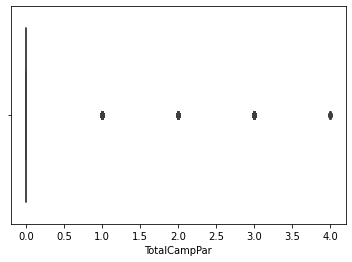

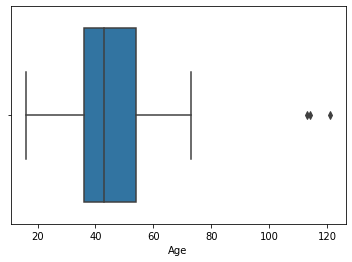

In [45]:
#Boxplots to visualise outliers
for column in cleaned_marketing_df_engineered.columns.tolist():
    if cleaned_marketing_df_engineered[column].dtypes in ['float32', 'float64', 'int32', 'int64']: 
        sns.boxplot(x=cleaned_marketing_df_engineered[column])
        plt.show()

In [46]:
def outlier_detection(df):
    column_dictionary = {}
    outlier_dictionary = {}
    for column in df.columns.tolist():
        if df[column].dtypes in ['float32', 'float64', 'int32', 'int64']: 
            Q1 = np.percentile(df[column], 25, interpolation = 'midpoint')
            Q3 = np.percentile(df[column], 75, interpolation = 'midpoint')

            IQR = Q3 - Q1
            low_lim = Q1 - 1.5 * IQR
            up_lim = Q3 + 1.5 * IQR

            outlier_list = []
            for value in df[column]:
                if ((value> up_lim) or (value<low_lim)):
                    outlier_list.append(value)

            column_dictionary[column] = outlier_list
            
            for keys, values in column_dictionary.items():
                if len(values) > 0 and len(set(values)) >=2:
                    outlier_dictionary[keys] = values
    return outlier_dictionary

In [47]:
outlier_marketing_df_dictionary = outlier_detection(cleaned_marketing_df_engineered)

In [48]:
print(outlier_marketing_df_dictionary)

{'Income': [157243.0, 162397.0, 153924.0, 160803.0, 157733.0, 157146.0, 156924.0, 666666.0], 'MntWines': [1332.0, 1349.0, 1241.0, 1285.0, 1248.0, 1239.0, 1396.0, 1288.0, 1379.0, 1478.0, 1492.0, 1492.0, 1279.0, 1308.0, 1478.0, 1253.0, 1394.0, 1296.0, 1285.0, 1230.0, 1315.0, 1298.0, 1302.0, 1449.0, 1259.0, 1252.0, 1459.0, 1493.0, 1324.0, 1285.0, 1462.0, 1276.0, 1245.0, 1486.0, 1311.0], 'MntFruits': [88.0, 100.0, 164.0, 120.0, 107.0, 111.0, 105.0, 172.0, 106.0, 194.0, 115.0, 99.0, 90.0, 133.0, 106.0, 162.0, 189.0, 138.0, 86.0, 114.0, 153.0, 134.0, 148.0, 84.0, 162.0, 129.0, 98.0, 183.0, 129.0, 147.0, 138.0, 153.0, 144.0, 104.0, 91.0, 163.0, 134.0, 152.0, 105.0, 114.0, 137.0, 190.0, 96.0, 84.0, 162.0, 138.0, 83.0, 92.0, 134.0, 155.0, 151.0, 85.0, 129.0, 153.0, 129.0, 183.0, 127.0, 91.0, 107.0, 129.0, 103.0, 89.0, 105.0, 181.0, 112.0, 159.0, 134.0, 102.0, 86.0, 123.0, 166.0, 142.0, 133.0, 178.0, 93.0, 107.0, 97.0, 115.0, 168.0, 91.0, 148.0, 174.0, 122.0, 123.0, 91.0, 199.0, 102.0, 138.0, 10

In [49]:
def winsorizing_outliers(outlier_columns, df):
    
    for key in outlier_columns:
        Q95 = np.percentile(df[key], 95, interpolation = 'midpoint')
        Q5 = np.percentile(df[key], 5, interpolation = 'midpoint')
        Q1 = np.percentile(df[key], 25, interpolation = 'midpoint')
        Q3 = np.percentile(df[key], 75, interpolation = 'midpoint')

        IQR = Q3 - Q1
        low_lim = Q1 - 1.5 * IQR
        up_lim = Q3 + 1.5 * IQR

        for value, index in zip(df[key], df[key].index.tolist()):
            if (value > up_lim):
                df.loc[index, [key]] = Q95
            elif (value < low_lim):
                df.loc[index, [key]] = Q5    

In [50]:
outlier_columns = ['Income', 'Age']
winsorizing_outliers(outlier_columns, cleaned_marketing_df_engineered)

## Data Export

In [51]:
cleaned_marketing_df_engineered.to_csv('./Data/cleaned_marketing_engineered.csv', index=False)

In [52]:
df = pd.read_csv('./Data/cleaned_marketing_engineered.csv')
df.head()

,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Minorshome,TotalMnt,TotalPurchases,TotalCampPar,Age
0,Graduation,Single,58138.0,2012-09-04,58,635.0,88.0,546.0,172.0,88.0,...,0,0,0,0,1,0,1617.0,22,0,55
1,Graduation,Single,46344.0,2014-03-08,38,11.0,1.0,6.0,2.0,1.0,...,0,0,0,0,0,2,27.0,4,0,60
2,Graduation,Married,71613.0,2013-08-21,26,426.0,49.0,127.0,111.0,21.0,...,0,0,0,0,0,0,776.0,20,0,48
3,Graduation,Married,26646.0,2014-02-10,26,11.0,4.0,20.0,10.0,3.0,...,0,0,0,0,0,1,53.0,6,0,30
4,PhD,Married,58293.0,2014-01-19,94,173.0,43.0,118.0,46.0,27.0,...,0,0,0,0,0,1,422.0,14,0,33
